In [2]:
import pandas as pd

# Load the CSV files
sales_df = pd.read_csv("retail_sales_dataset.csv")
menu_df = pd.read_csv("menu.csv")

# Display first 5 rows
print("Retail Sales Dataset:")
print(sales_df.head())

print("\nMenu Dataset:")
print(menu_df.head())

# Check the shape (rows, columns)
print("\nSales Data Shape:", sales_df.shape)
print("Menu Data Shape:", menu_df.shape)


Retail Sales Dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Menu Dataset:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast        

In [3]:
# Check for missing values
print("Missing values in each column:")
print(sales_df.isnull().sum())

# Convert 'Date' column to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')

# Check data types again
print("\nData types after Date conversion:")
print(sales_df.dtypes)

# Remove rows with invalid or missing dates
sales_df = sales_df.dropna(subset=['Date'])

# Remove any duplicates just in case
sales_df = sales_df.drop_duplicates()

# Reset index
sales_df.reset_index(drop=True, inplace=True)

# Final shape
print("\nCleaned Sales Data Shape:", sales_df.shape)


Missing values in each column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Data types after Date conversion:
Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

Cleaned Sales Data Shape: (1000, 9)


In [4]:
# Summary of numeric columns
print("Descriptive Statistics:")
print(sales_df.describe())

# Mode (most frequent)
print("\nMode of each column:")
print(sales_df.mode().iloc[0])

# Category-wise total amount
print("\nSales by Product Category:")
print(sales_df.groupby('Product Category')['Total Amount'].sum())

# Gender-based average spend
print("\nAverage Spend by Gender:")
print(sales_df.groupby('Gender')['Total Amount'].mean())

# Age group segmentation (optional)
sales_df['Age Group'] = pd.cut(sales_df['Age'], bins=[18, 25, 35, 50, 65], labels=['18-25', '26-35', '36-50', '51-65'])
print("\nSales by Age Group:")
print(sales_df.groupby('Age Group')['Total Amount'].sum())


Descriptive Statistics:
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000

C:\Users\hrithika singh\AppData\Local\Temp\ipykernel_17700\3768163565.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(sales_df.groupby('Age Group')['Total Amount'].sum())


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

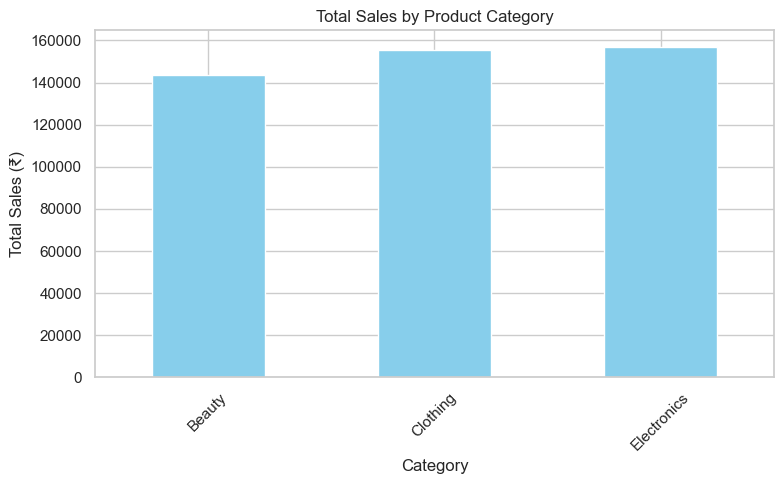

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Sales by Product Category
category_sales = sales_df.groupby('Product Category')['Total Amount'].sum().sort_values()

plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


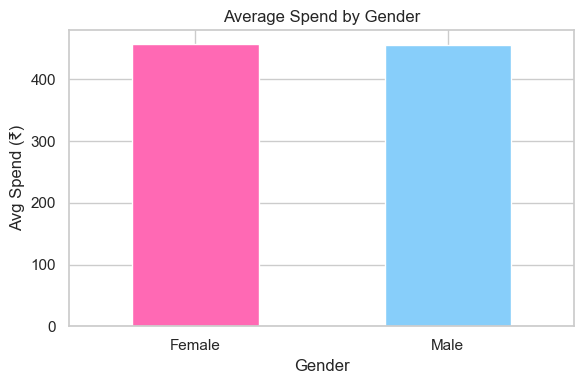

In [8]:
gender_sales = sales_df.groupby('Gender')['Total Amount'].mean()

plt.figure(figsize=(6, 4))
gender_sales.plot(kind='bar', color=['#FF69B4', '#87CEFA'])
plt.title('Average Spend by Gender')
plt.ylabel('Avg Spend (₹)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\hrithika singh\AppData\Local\Temp\ipykernel_17700\1839488870.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = sales_df.groupby('Age Group')['Total Amount'].sum()


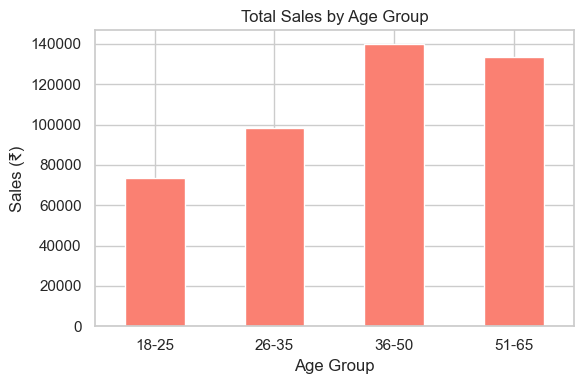

In [9]:
age_group_sales = sales_df.groupby('Age Group')['Total Amount'].sum()

plt.figure(figsize=(6, 4))
age_group_sales.plot(kind='bar', color='salmon')
plt.title('Total Sales by Age Group')
plt.ylabel('Sales (₹)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


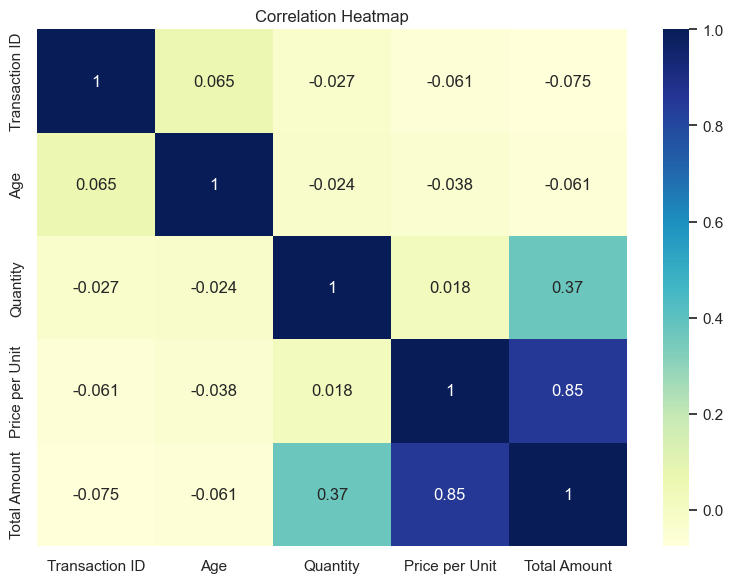

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(sales_df.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


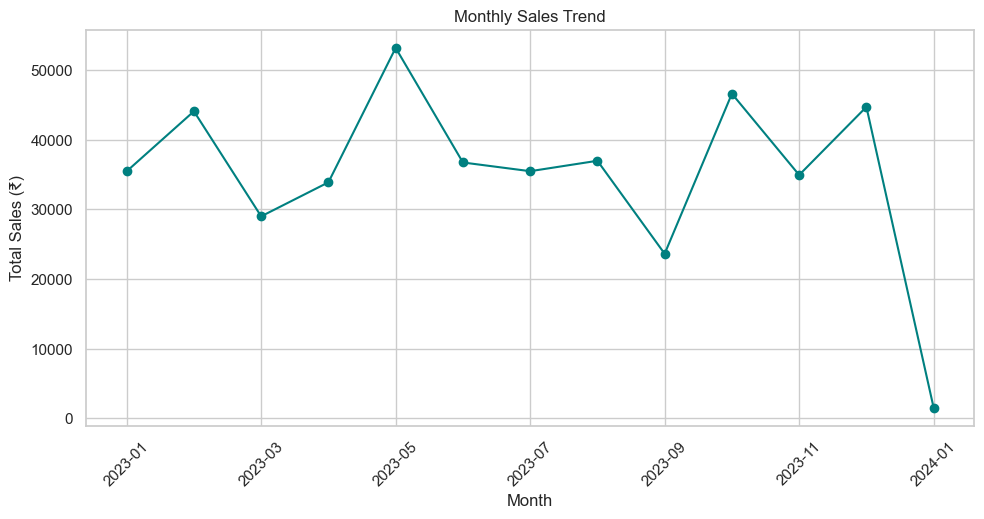

In [11]:
# Extract month from date
sales_df['Month'] = sales_df['Date'].dt.to_period('M')  # e.g., 2023-07

# Group by Month
monthly_sales = sales_df.groupby('Month')['Total Amount'].sum()

# Convert Period to string for plotting
monthly_sales.index = monthly_sales.index.astype(str)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
